In [1]:
# Import necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_widths

In [2]:
# Load data
data = pd.read_csv('ngc5548data.csv')
data

,Date,F(1350),F(Lya),F(C IV)
0,7510.139,37.1,45.6,63.8
1,7514.082,40.3,49.3,71.7
2,7517.926,42.1,50.4,69.4
3,7522.091,41.0,53.0,74.0
4,7526.099,51.0,55.5,69.1
...,...,...,...,...
80,7733.775,20.8,45.3,55.8
81,7737.662,16.8,40.7,49.6
82,7737.759,15.0,39.7,52.6
83,7741.582,17.3,38.8,46.6


In [3]:
# Initialize data
time = data['Date']
f1350 = data['F(1350)']
flya = data['F(Lya)']
fciv = data['F(C IV)']

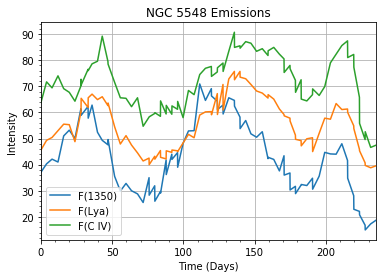

In [4]:
# Plot Emission Spectra
ngc5548_emission = plt.figure()

plt.plot(time - time[0], f1350, label='F(1350)')
plt.plot(time - time[0], flya, label='F(Lya)')
plt.plot(time - time[0], fciv, label='F(C IV)')

plt.title('NGC 5548 Emissions')
plt.grid(axis='both')
plt.xlabel('Time (Days)')
plt.xticks(ticks=np.arange(0, 235, step=50))
plt.xlim(0, 235)
plt.minorticks_on()
plt.ylabel('Intensity')
plt.legend(loc='lower left')
plt.show()
ngc5548_emission.savefig('NGC5548_emission.png')

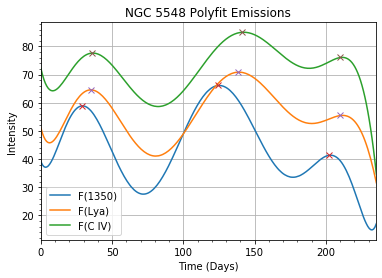

In [10]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)

# calculate polynomial
z1 = np.polyfit(time, f1350, 35)
f1 = np.poly1d(z1)
z2 = np.polyfit(time, flya, 35)
f2 = np.poly1d(z2)
z3 = np.polyfit(time, fciv, 35)
f3 = np.poly1d(z3)

# calculate new x's and y's
x1_new = np.linspace(time[0], time[84], 235)
y1_new = f1(x1_new)
x2_new = np.linspace(time[0], time[84], 235)
y2_new = f2(x2_new)
x3_new = np.linspace(time[0], time[84], 235)
y3_new = f3(x3_new)

# Find the peaks
peaks1, _ = find_peaks(y1_new, height=0)
peaks2, _ = find_peaks(y2_new, height=0)
peaks3, _ = find_peaks(y3_new, height=0)

# Plot and save figure
ngc5548_smooth_emission = plt.figure()

plt.plot(x1_new - x1_new[0], y1_new, label='F(1350)')
plt.plot(x2_new - x2_new[0], y2_new, label='F(Lya)')
plt.plot(x3_new - x3_new[0], y3_new, label='F(C IV)')

plt.plot(peaks1, y1_new[peaks1], "x")
plt.plot(peaks2, y2_new[peaks2], "x")
plt.plot(peaks3, y3_new[peaks3], "x")

plt.title('NGC 5548 Polyfit Emissions')
plt.grid(axis='both')
plt.xlabel('Time (Days)')
plt.xticks(ticks=np.arange(time[0] - time[0], time[84] - time[0], step=50))
plt.xlim(0, 235)
plt.minorticks_on()
plt.ylabel('Intensity')
plt.legend(loc='lower left')
plt.show()

ngc5548_smooth_emission.savefig('NGC5548_smooth_emission.png')

In [6]:
print(peaks1)
print(peaks2)
print(peaks3)

diff12 = np.mean(peaks1 - peaks2)
diff13 = np.mean(peaks1 - peaks3)

print(diff12)
print(diff13)
print((diff12 + diff13) / 2)

[ 29 124 202]
[ 35 138 210]
[ 36 141 210]
-9.333333333333334
-10.666666666666666
-10.0


In [7]:
print(peaks1 - peaks2)
print(peaks1 - peaks3)

[ -6 -14  -8]
[ -7 -17  -8]
